# Example: Exporting data from a data catalog

This example illustrates the how to read and export data for a specific region / dates using the HydroMT [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) and the [export_data()](../_generated/hydromt.data_catalog.DataCatalog.export_data.rst) method.

## Explore the current data catalog
For this exercise, we will use the pre-defined catalog `artifact_data` which contains a global data extracts for the Piave basin in Northern Italy. This data catalog and the actual data linked to it are for a small geographic extent as it is intended for documentation and testing purposes only. If you have another data catalog available (and the linked data), you can use it instead.

To read your own data catalog (as well as a predefined catalog), you can use the **data_libs** argument of the [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) which accepts either a absolute/relative path to a data catalog yaml file or a name of a pre-defined catalog.
First let's read the pre-defined artifact data catalog:

In [1]:
import hydromt

# Download and read artifacts for the Piave basin to `~/.hydromt_data/`.
data_catalog = hydromt.DataCatalog(data_libs=["artifact_data=v1.0.0"])

The `artifact_data` catalog is one of the pre-defined available DataCatalog of HydroMT. You can find an overview of [pre-defined data catalogs](../guides/user_guide/data_existing_cat.rst) in the online user guide. You can also get an overview of the pre-defined catalogs with their version number from HydroMT.

In [2]:
from pprint import pprint

pprint(data_catalog.predefined_catalogs)

{'artifact_data': <hydromt.data_catalog.predefined_catalog.ArtifactDataCatalog object at 0x78bdc465a0a0>,
 'aws_data': <hydromt.data_catalog.predefined_catalog.AWSDataCatalog object at 0x78bdc465a160>,
 'deltares_data': <hydromt.data_catalog.predefined_catalog.DeltaresDataCatalog object at 0x78bdc465adf0>,
 'gcs_cmip6_data': <hydromt.data_catalog.predefined_catalog.GCSCMIP6DataCatalog object at 0x78bdc465a220>}


Let's now check which data sources are available in the catalog:

In [3]:
# For a list of sources including attributes
data_catalog.sources.keys()

dict_keys(['chelsa', 'chirps_global', 'corine', 'dtu10mdt', 'dtu10mdt_egm96', 'eobs', 'eobs_orography', 'era5', 'era5_hourly', 'era5_daily_zarr', 'era5_hourly_zarr', 'era5_orography', 'gadm_level1', 'gadm_level2', 'gadm_level3', 'gcn250', 'gdp_world', 'gebco', 'ghs_smod_2015', 'ghs_pop_2015', 'ghs_pop_2015_54009', 'globcover_2009', 'glw_buffaloes', 'glw_cattle', 'glw_chicken', 'glw_ducks', 'glw_goats', 'glw_horses', 'glw_pigs', 'glw_sheep', 'grdc', 'grip_roads', 'grwl', 'grwl_mask', 'gswo', 'gtsmv3_eu_era5', 'guf_bld_2012', 'hydro_lakes', 'hydro_reservoirs', 'koppen_geiger', 'mdt_cnes_cls18', 'merit_hydro', 'merit_hydro_ihu', 'merit_hydro_index', 'modis_lai', 'osm_coastlines', 'osm_landareas', 'rgi', 'hydro_rivers_lin', 'simard', 'soilgrids', 'vito_2015', 'wb_countries', 'worldclim'])

And let's now open a plot one of the available datasets to check extent and available dates:

In [4]:
ds = data_catalog.get_rasterdataset("era5", time_range=("2010-02-02", "2010-02-15"))
print("")
print(f"Available extent: {ds.raster.bounds}")
print(f"Available dates: {ds.time.values[0]} to {ds.time.values[-1]}")
ds

object: RasterDatasetXarrayDriver does not use kwarg time_range with value <generator object DataAdapterBase._to_source_timerange.<locals>.<genexpr> at 0x78bdc46059e0>.


object: RasterDatasetXarrayDriver does not use kwarg metadata with value crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 unit=None extent={} nodata=None attrs={} category='meteo' history='Extracted from Copernicus Climate Data Store; resampled by Deltares to daily frequency' paper_doi='10.1002/qj.3803' paper_ref='Hersbach et al. (2019)' url='https://doi.org/10.24381/cds.bd0915c6' license='https://cds.climate.copernicus.eu/cdsapp/#!/terms/licence-to-use-copernicus-products'.



Available extent: (11.625, 45.125, 13.125, 46.875)
Available dates: 2010-02-02T00:00:00.000000000 to 2010-02-15T00:00:00.000000000


<xarray.Dataset> Size: 17kB
Dimensions:      (time: 14, latitude: 7, longitude: 6)
Coordinates:
  * time         (time) datetime64[ns] 112B 2010-02-02 2010-02-03 ... 2010-02-15
  * longitude    (longitude) float32 24B 11.75 12.0 12.25 12.5 12.75 13.0
  * latitude     (latitude) float32 28B 46.75 46.5 46.25 46.0 45.75 45.5 45.25
    spatial_ref  int32 4B ...
Data variables:
    precip       (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    temp         (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    press_msl    (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    kin          (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    kout         (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    temp_min     (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
    temp_max     (time, latitude, longitude) float32 2kB dask.array<chunksize=(14, 7, 6), meta=np.ndarray>
Attributes:
    category:        meteo
    history:         Extracted from Copernicus Climate Data Store; resampled ...
    paper_doi:       10.1002/qj.3803
    paper_ref:       Hersbach et al. (2019)
    source_license:  https://cds.climate.copernicus.eu/cdsapp/#!/terms/licenc...
    source_url:      https://doi.org/10.24381/cds.bd0915c6
    source_version:  ERA5 daily data on pressure levels
    crs:             4326
    url:             https://doi.org/10.24381/cds.bd0915c6
    license:         https://cds.climate.copernicus.eu/cdsapp/#!/terms/licenc...

## Export an extract of the data

Now we will export a subset of the data in our `artifact_data` catalog using the [DataCatalog.export_data()](../_generated/hydromt.data_catalog.DataCatalog.export_data.rst) method. Let's check the method's docstring:

In [5]:
?data_catalog.export_data

Let's select which data source and the extent we want (based on the exploration above): 

In [6]:
# List of data sources to export
# NOTE that for ERA5 we only export the precip variable and for merit_hydro we only export the elevtn variable
source_list = ["merit_hydro[elevtn,flwdir]", "era5[precip]", "vito_2015"]
# Geographic extent
bbox = [12.0, 46.0, 13.0, 46.5]
# Time extent
time_range = ("2010-02-10", "2010-02-15")

And let's export the *tmp_data_export* folder:

In [7]:
folder_name = "tmp_data_export"
data_catalog.export_data(
    new_root=folder_name,
    bbox=bbox,
    time_range=time_range,
    source_names=source_list,
    metadata={"version": "1"},
)

object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 46, 13 46.5, 12 46.5, 12 46, 13 46)).


object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 46, 13 46.5, 12 46.5, 12 46, 13 46)).


object: RasterioDriver does not use kwarg time_range with value (datetime.datetime(2010, 2, 10, 0, 0), datetime.datetime(2010, 2, 15, 0, 0)).


Unknown extension for RasterDatasetXarrayDriver: .tif,switching to zarr


object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 46, 13 46.5, 12 46.5, 12 46, 13 46)).


object: RasterDatasetXarrayDriver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 46, 13 46.5, 12 46.5, 12 46, 13 46)).


object: RasterDatasetXarrayDriver does not use kwarg time_range with value <generator object DataAdapterBase._to_source_timerange.<locals>.<genexpr> at 0x78bdc4403f20>.


object: RasterDatasetXarrayDriver does not use kwarg metadata with value crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 unit=None extent={} nodata=None attrs={} category='meteo' history='Extracted from Copernicus Climate Data Store; resampled by Deltares to daily frequency' paper_doi='10.1002/qj.3803' paper_ref='Hersbach et al. (2019)' url='https://doi.org/10.24381/cds.bd0915c6' license='https://cds.climate.copernicus.eu/cdsapp/#!/terms/licence-to-use-copernicus-products'.


object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 46, 13 46.5, 12 46.5, 12 46, 13 46)).


object: RasterioDriver does not use kwarg time_range with value (datetime.datetime(2010, 2, 10, 0, 0), datetime.datetime(2010, 2, 15, 0, 0)).


Unknown extension for RasterDatasetXarrayDriver: .tif,switching to zarr


## Open and explore the exported data

Now we have our new extracted data and HydroMT saved as well a new data catalog file that goes with it:

In [8]:
import os

for path, _, files in os.walk(folder_name):
    print(path)
    for name in files:
        print(f" - {name}")

tmp_data_export
 - data_catalog.yml
 - era5.nc
tmp_data_export/elevtn.zarr
 - .zattrs
 - .zgroup
 - .zmetadata
tmp_data_export/elevtn.zarr/uparea
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/spatial_ref
 - .zattrs
 - 0
 - .zarray
tmp_data_export/elevtn.zarr/strord
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/upgrid
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/x
 - .zattrs
 - 0
 - .zarray
tmp_data_export/elevtn.zarr/hnd
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/elevtn
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/basins
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/y
 - .zattrs
 - 0
 - .zarray
tmp_data_export/elevtn.zarr/lndslp
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/rivwth
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/elevtn.zarr/flwdir
 - 0.0
 - .zattrs
 - .zarray
tmp_data_export/vito.zarr
 - .zattrs
 - .zgroup
 - .zmetadata
tmp_data_export/vito.zarr/spatial_ref
 - .zattrs
 - 0
 - .zarray
tmp_data

In [9]:
with open(os.path.join(folder_name, "data_catalog.yml"), "r") as f:
    print(f.read())

meta:
  version: '1'
  root: /home/sam/work/hmt/hydromt/docs/_examples/tmp_data_export
era5:
  uri: /home/sam/work/hmt/hydromt/docs/_examples/tmp_data_export/era5.nc
  data_adapter:
    unit_add:
      temp: -273.15
      temp_max: -273.15
      temp_min: -273.15
      time: 86400
    unit_mult:
      kin: 0.000277778
      kout: 0.000277778
      precip: 1000
      press_msl: 0.01
  driver:
    name: raster_xarray
  version: ERA5 daily data on pressure levels
  metadata:
    crs: 4326
    category: meteo
    history: Extracted from Copernicus Climate Data Store; resampled by Deltares to
      daily frequency
    paper_doi: 10.1002/qj.3803
    paper_ref: Hersbach et al. (2019)
    url: https://doi.org/10.24381/cds.bd0915c6
    license: https://cds.climate.copernicus.eu/cdsapp/#!/terms/licence-to-use-copernicus-products
  data_type: RasterDataset
  root: /home/sam/work/hmt/hydromt/docs/_examples/tmp_data_export
merit_hydro:
  uri: /home/sam/work/hmt/hydromt/docs/_examples/tmp_data_expor

Let's open the extracted data catalog:

In [10]:
data_catalog_extract = hydromt.DataCatalog(
    data_libs=os.path.join(folder_name, "data_catalog.yml")
)
data_catalog_extract.sources.keys()

dict_keys(['era5', 'merit_hydro', 'vito_2015'])

And now let's open the extracted data again and do a nice plot.

In [11]:
# Get both the extracted and original merit_hydro_1k DEM
dem = data_catalog.get_rasterdataset(
    "merit_hydro", variables=["elevtn"], bbox=[11.6, 45.2, 13.0, 46.8]
)
dem_extract = data_catalog_extract.get_rasterdataset(
    "merit_hydro", variables=["elevtn"]
)

object: ConventionResolver does not use kwarg mask with value                                             geometry
0  POLYGON ((13 45.2, 13 46.8, 11.6 46.8, 11.6 45....


object: RasterDatasetXarrayDriver does not use kwarg variables with value ['elevtn'].


object: RasterDatasetXarrayDriver does not use kwarg metadata with value crs=<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 unit=None extent={} nodata=None attrs={} category='topography' paper_doi='10.1029/2019WR024873' paper_ref='Yamazaki et al. (2019)' url='http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_Hydro' license='CC-BY-NC 4.0 or ODbL 1.0'.


Text(0.5, 1.0, 'exported and original DEMs')

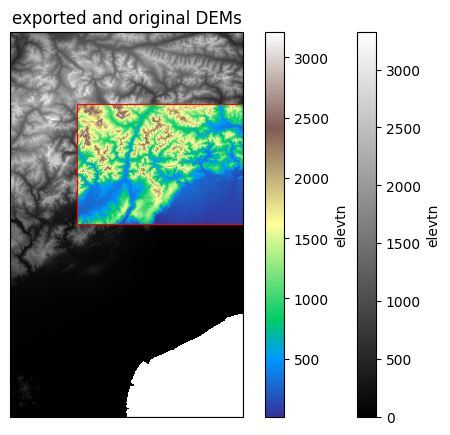

In [12]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

proj = ccrs.PlateCarree()  # plot projection


# get bounding box of each data catalog using merit_hydro_1k
bbox = gpd.GeoDataFrame(geometry=[box(*dem.raster.bounds)], crs=4326)
bbox_extract = gpd.GeoDataFrame(geometry=[box(*dem_extract.raster.bounds)], crs=4326)

# Initialise plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(projection=proj)

# Plot the bounding box
bbox.boundary.plot(ax=ax, color="k", linewidth=0.8)
bbox_extract.boundary.plot(ax=ax, color="red", linewidth=0.8)

# Plot elevation
dem.raster.mask_nodata().plot(ax=ax, cmap="gray")
dem_extract.raster.mask_nodata().plot(ax=ax, cmap="terrain")
ax.set_title("exported and original DEMs")